In [17]:
import numpy as np
import pandas as pd
#you may want to import some other modules here such as seaborn or matplotlib

In [18]:
from io import BytesIO
from zipfile import ZipFile
import requests

**Let download movie lense dataset [MovieLens](https://grouplens.org/datasets/movielens/) and extract zip file using various python packages**

http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

In [19]:
r = requests.get("http://files.grouplens.org/datasets/movielens/ml-latest-small.zip")
print(r.status_code)
zipfile = ZipFile(BytesIO(r.content))

200


In [20]:
zipfile.extractall()

In [21]:
! ls ml-latest-small/

README.txt  links.csv   movies.csv  ratings.csv tags.csv


In [22]:
! head  ./ml-latest-small/movies.csv

**It is a csv file.** We can use pandas read_csv to read this file into pandas DataFrame

In [23]:
# lets read movies.csv file
movie = pd.read_csv('./ml-latest-small/movies.csv')

movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Check if any of the columns are null

In [24]:
# write pandas code here
movie.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

# Check datatype of each of the columns

In [25]:
# write pandas code here
movie.dtypes

movieId     int64
title      object
genres     object
dtype: object

# Using *str* on series genres, build following  unique_genre set. It should contain all the unique genres from genres column. Print unique genres too.



In [26]:
# write pandas code here
movie_split = movie["genres"].str.split("|", expand=True)
unique_genre = movie_split.stack().drop_duplicates().tolist()


print(unique_genre)

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX', 'Western', 'Film-Noir', '(no genres listed)']


# Build columns for different genres with value True or False based on whether a genre is present or not in an observation?



In [27]:
# write pandas code here
import re

genres_one_hot = movie["genres"].str.get_dummies(sep="|").sum(axis=0)
for genre in genres_one_hot.index:
    movie[genre] = movie["genres"].apply(lambda x: re.search(re.escape(genre), x) is not None)

movie.sample(5)

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3663,5041,Fire and Ice (1983),Animation|Fantasy,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5530,26578,"Sacrifice, The (Offret - Sacraficatio) (1986)",Drama,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9369,162578,Kubo and the Two Strings (2016),Adventure|Animation|Children|Fantasy,False,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
704,922,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),Drama|Film-Noir|Romance,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
9350,161032,The Grandmother (1970),Action|Drama,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Build a "year" column in movie data frame. The title "year" should be embedded in title columns.

Python regular expression  package **re** is very useful tool for text data handling.  This excercise is a very primitive use of it.


note
- . mean any character
- *. means "0 or more instances of the preceding regex token
- \[ matches a literal [ character
- [A-Za-z0-9] digits and lower, upper case, I think same as \w+
- '+' matches one more more times
- \d Matches any decimal digit

In [28]:
# write pandas code here
import re

movie["year"] = movie["title"].str.extract(r'(\d{4})').fillna(0).astype(int)

movie.sample(5)

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
2669,3572,Carnosaur (1993),Horror|Sci-Fi,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,1993
3645,5009,Ali (2001),Drama,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2001
7938,95738,"Adventures of Mary-Kate and Ashley, The: The C...",Children|Musical|Mystery,False,False,False,False,True,False,False,...,False,False,True,True,False,False,False,False,False,1995
2971,3983,You Can Count on Me (2000),Drama|Romance,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,2000
4079,5820,Standing in the Shadows of Motown (2002),Documentary|Musical,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,2002


# Using seaborn, plot a bar plot of average number of movies per year. Do you see any trend?

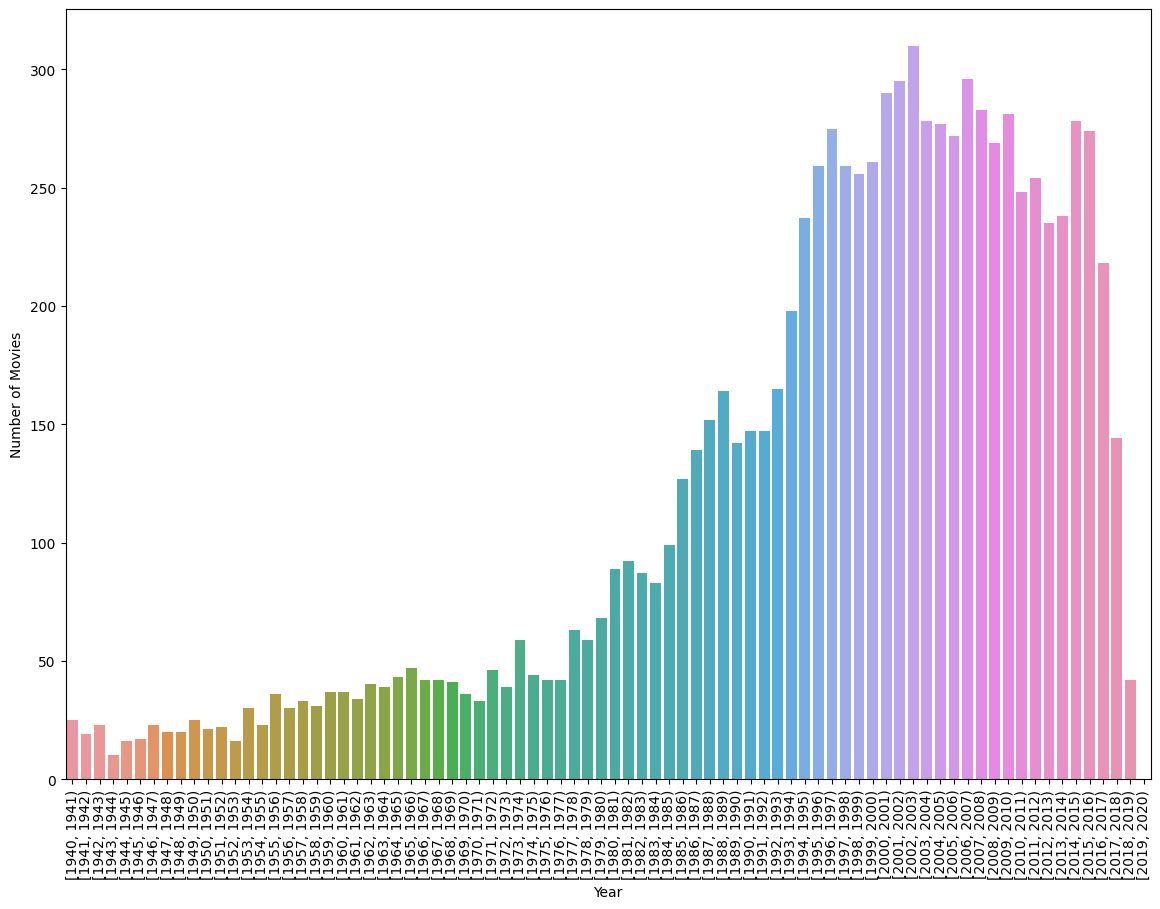

In [29]:
# write code here.
grouped = movie.groupby(pd.cut(movie['year'], bins=range(1940, 2021, 1), right=False)).count()['title']

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=grouped.index, y=grouped.values, figure=plt.figure(figsize=(14, 10)))
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.xticks(rotation=90)

plt.show()


# Using matplotlib, plot total number of movies (cumulative over all the years) for each genre.  Your plot should have proper title, axis labels and legends. 

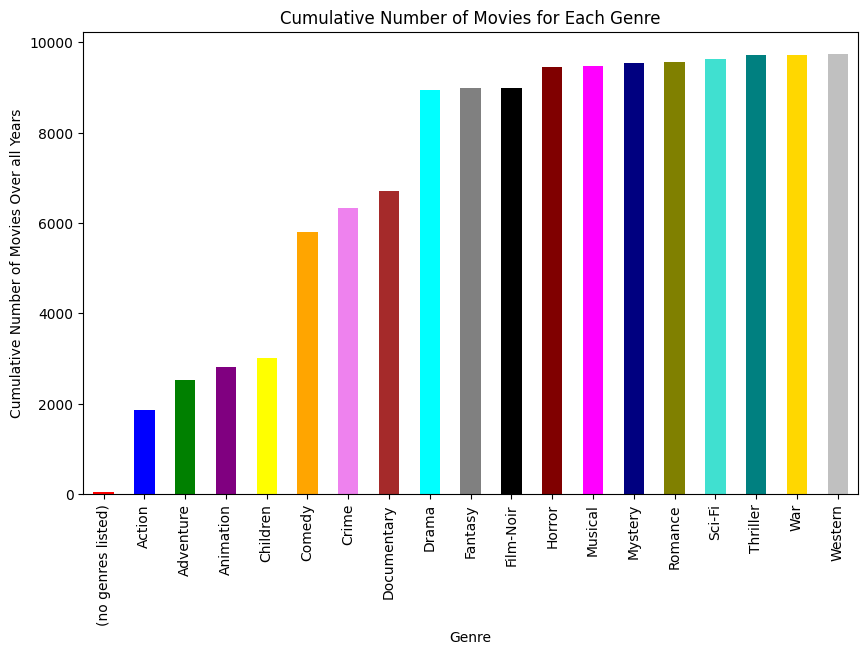

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Group movie data by genre and count number of movies in each genre
genre_group = movie.groupby(movie['genres'].str.split('|').str[0]).count()["title"]

# Get cumulative sum of movie counts for each genre
genre_cumulative = genre_group.cumsum()

# Define colors
colors = ['red', 'blue', 'green', 'purple', 'yellow', 'orange', 'violet', 'brown', 'cyan', 'gray', 'black', 'maroon', 'magenta', 'navy', 'olive', 'turquoise', 'teal', 'gold', 'silver']

# Plot cumulative sum of movie counts for each genre
genre_cumulative.plot(kind='bar', figsize=(10, 6), color=colors)
plt.xlabel("Genre")
plt.ylabel("Cumulative Number of Movies Over all Years")
plt.title("Cumulative Number of Movies for Each Genre")
plt.show()


# Build a *movie_title* column containing  the title of the movie. (It should not contain year). Drop the original *title* columns. Display final movie dataFrame.

In [31]:
# write pandas code here
# Split the title column on the year surrounded by parentheses
movie['movie_title'] = movie['title'].str.split('(', n=1, expand=True)[0].str.strip()

# Drop the original title column
movie = movie.drop('title', axis=1)

# Display the final movie dataframe
movie.sample(5)

,movieId,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year,movie_title
2056,2735,Action|Adventure|Comedy|Fantasy|Mystery,False,True,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,1986,"Golden Child, The"
767,1009,Adventure|Children|Fantasy,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,1975,Escape to Witch Mountain
4685,6996,Action|Sci-Fi,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,1991,Highlander II: The Quickening
8733,127130,Comedy,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,2015,Mistress America
335,378,Comedy|Romance,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,1994,Speechless


# Using seaborn, plot average number of words in a movie name over the years in different genres. You may choose to make separate plots for each genre or to make a single color coded plot as a function of years. All plots should have proper title, axis labels and legends. Write your observation in no more than 2 lines.

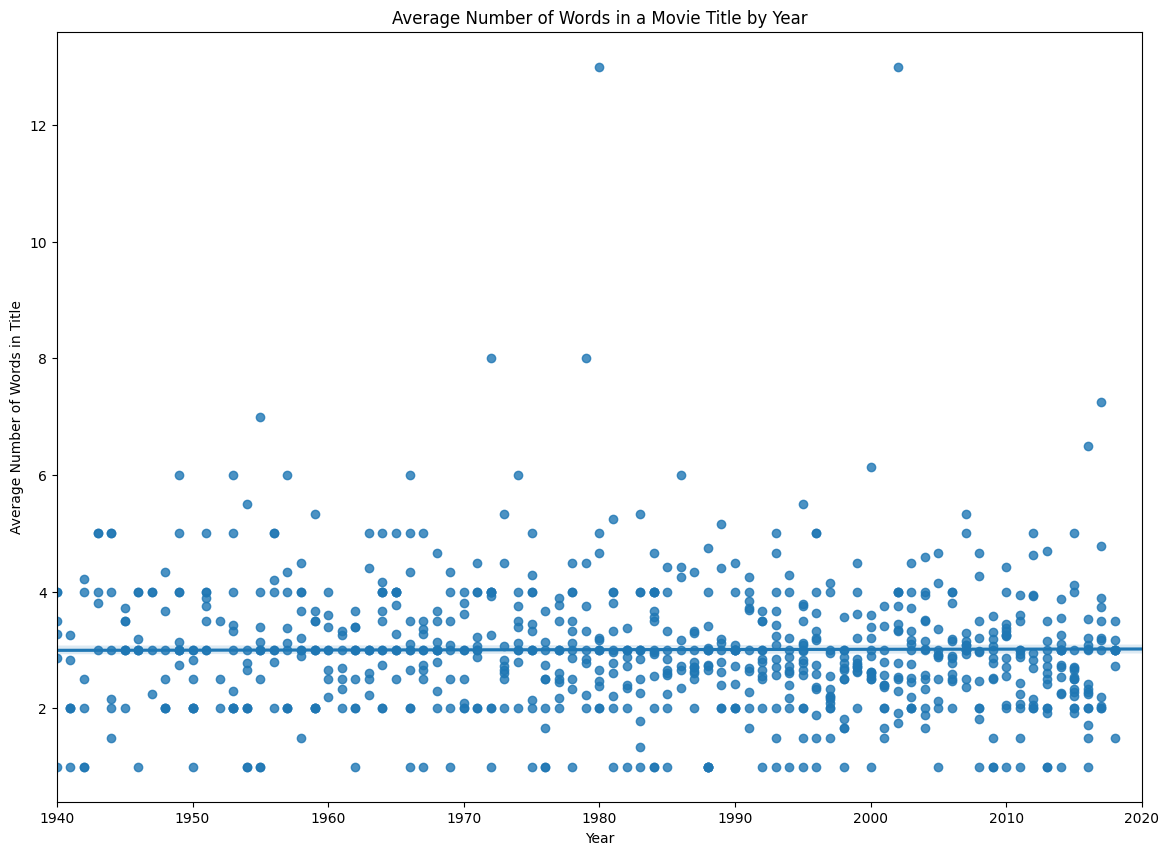

In [32]:
# Write your code here.
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create a new column containing the number of words in the movie title
movie['word_count'] = movie['movie_title'].str.split().apply(len)
movie['genre'] = movie['genres'].str.split('|', n=1, expand=True)[0].str.strip()

# Group the data by year and genre and calculate the mean word count for each group
grouped = movie.groupby(['year', 'genre'])['word_count'].mean().reset_index()

# Plot the data
plt.figure(figsize=(14, 10))
sns.regplot(x='year', y='word_count', data=grouped)
plt.xlim(1940, 2020)

# Add a title, axis labels
plt.title("Average Number of Words in a Movie Title by Year")
plt.xlabel("Year")
plt.ylabel("Average Number of Words in Title")

# Show the plot
plt.show()

#### In the above plot, we conclude the most number of words in a movie title is between 2 - 4 and looks average between 4 - 6, a few between 6 - 8, and only two movies above 12 words in the 1980 and 2000s.